In [ ]:
#check the lasso and Ridge results by changing the hyperparameter
#lasso_1=Lasso(alpha=1) # 1, 10, 100, 1000
#ridge_1=Ridge(alpha=1) # 1, 10, 100, 1000

In [2]:
# data analysis and visualization stack
import numpy as np
import matplotlib.pyplot as plt

# machine learning stack
from sklearn.linear_model import LinearRegression

Create data following $\sqrt{x}$ 

In [3]:
# specify a random state
np.random.seed(13)

In [4]:
# create a data set fluctuating around squre root of x
X=np.arange(1,60, 5) # from 1 to 60 in steps of 6
y=[np.sqrt(xi)+np.random.normal(0, 0.5) for xi in X]

In [5]:
X

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56])

In [6]:
y

[0.643804668974706,
 2.8263729321130295,
 3.2943732511863733,
 4.2259061693728945,
 5.255126549181345,
 5.365188457740057,
 6.242858312691284,
 6.43060568708466,
 7.1424671061507965,
 6.259641417856001,
 6.746933916067076,
 6.852511800888348]

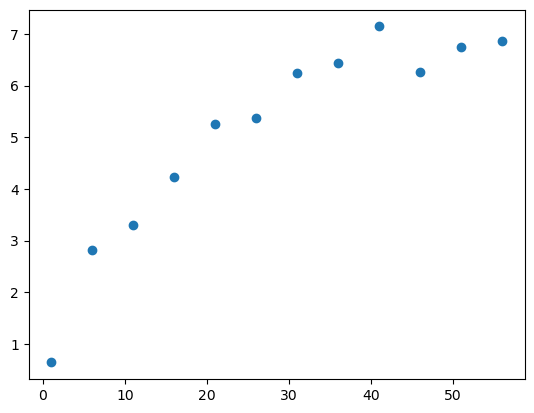

In [8]:
plt.scatter(X,y);

In [9]:
X.shape

(12,)

In [10]:
# reshape the X to a 2D array for later use in sklearn mdels
X=X.reshape(-1,1)
X.shape

(12, 1)

In [11]:
X

array([[ 1],
       [ 6],
       [11],
       [16],
       [21],
       [26],
       [31],
       [36],
       [41],
       [46],
       [51],
       [56]])

### Underfitting (high bias)

In [12]:
# fit linear regression on the data
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [13]:
# predict y by lr model
y_pred=model.predict(X)

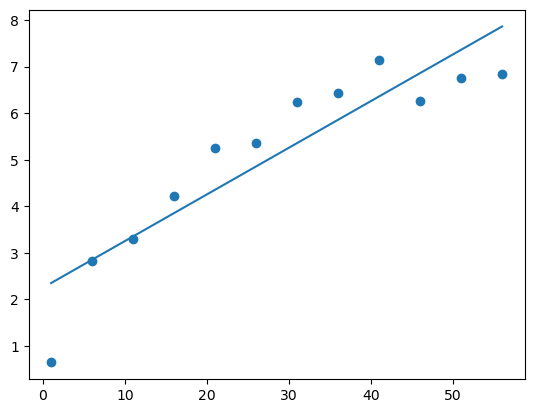

In [15]:
# plot both linear regression line and the original data
plt.scatter(X,y)
plt.plot(X, y_pred);

Overfit

In [16]:
# additional pakages from sklearn for adding more terms to the equation
from sklearn.preprocessing import PolynomialFeatures

In [17]:
# convert the feature matrix to a polynomial form with the degree of 10
poly=PolynomialFeatures(degree=10, include_bias=False)
X_poly=poly.fit_transform(X)

In [18]:
X_poly.shape

(12, 10)

In [19]:
X_poly

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [6.00000000e+00, 3.60000000e+01, 2.16000000e+02, 1.29600000e+03,
        7.77600000e+03, 4.66560000e+04, 2.79936000e+05, 1.67961600e+06,
        1.00776960e+07, 6.04661760e+07],
       [1.10000000e+01, 1.21000000e+02, 1.33100000e+03, 1.46410000e+04,
        1.61051000e+05, 1.77156100e+06, 1.94871710e+07, 2.14358881e+08,
        2.35794769e+09, 2.59374246e+10],
       [1.60000000e+01, 2.56000000e+02, 4.09600000e+03, 6.55360000e+04,
        1.04857600e+06, 1.67772160e+07, 2.68435456e+08, 4.29496730e+09,
        6.87194767e+10, 1.09951163e+12],
       [2.10000000e+01, 4.41000000e+02, 9.26100000e+03, 1.94481000e+05,
        4.08410100e+06, 8.57661210e+07, 1.80108854e+09, 3.78228594e+10,
        7.94280047e+11, 1.66798810e+13],
       [2.60000000e+01, 6.76000000e+02, 1.75760000e+04, 4.56976000e+05,
   

In [20]:
# fit the linear regression model on X_poly
model=LinearRegression()
model.fit(X_poly,y)
y_pred_poly=model.predict(X_poly)

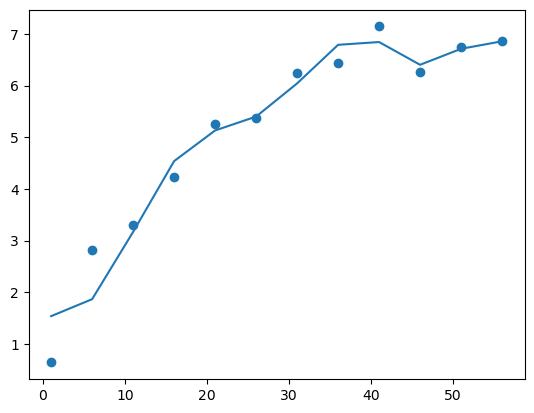

In [21]:
# plot the fitted line and original data
plt.scatter(X,y)
plt.plot(X,y_pred_poly);

Overfitting

In [50]:
# importing new packages for lasso, ridge and elasticnet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [51]:
# naming new models
lasso=Lasso()
ridge=Ridge()
elast=ElasticNet()

In [52]:
# fitting new models on X_poly. It show warning beacuse it is not able to convert with the iteration
lasso.fit(X_poly, y)
ridge.fit(X_poly, y)
elast.fit(X_poly, y)

/Users/Shivani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.661e+00, tolerance: 4.352e-03
  model = cd_fast.enet_coordinate_descent(
/Users/Shivani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.09197e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/Shivani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.673e+00, tolerance: 4.352e-03
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [53]:
# calculate y_pred by new models
y_lasso=lasso.predict(X_poly)
y_ridge=ridge.predict(X_poly)
y_elast=elast.predict(X_poly)

In [54]:
# naming new models
lasso_100=Lasso(alpha=100)
ridge_100=Ridge(alpha=100)
elast=ElasticNet()

In [55]:
# fitting new models on X_poly. It show warning beacuse it is not able to convert with the iteration
lasso_100.fit(X_poly, y)
ridge_100.fit(X_poly, y)
elast.fit(X_poly, y)

/Users/Shivani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.520e+00, tolerance: 4.352e-03
  model = cd_fast.enet_coordinate_descent(
/Users/Shivani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.2456e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/Shivani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.673e+00, tolerance: 4.352e-03
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [56]:
# calculate y_pred by new models
y_lasso_100=lasso_100.predict(X_poly)
y_ridge_100=ridge_100.predict(X_poly)
y_elast=elast.predict(X_poly)

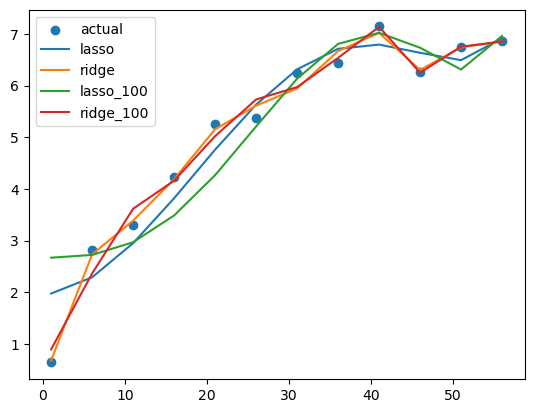

In [58]:
# plot all the models and comparing them
plt.scatter(X,y, label='actual')
#plt.plot(X, y_pred_poly, label='poly')
#show underfit and overfit
#plt.plot(X, y_pred, label='Linearregression')
#green line is lasso
plt.plot(X, y_lasso, label='lasso')
plt.plot(X, y_ridge, label='ridge')
#plt.plot(X, y_elast, label='elast')
plt.plot(X, y_lasso_100, label='lasso_100')
plt.plot(X, y_ridge_100, label='ridge_100')
#plt.plot(X, y_elast, label='elast')

plt.legend();